In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv("Data.csv",names = ['message','label'])
df = df.iloc[0:5574,]
df = df.reset_index()
df = df.drop(['index'],axis = 1)

In [3]:
df.tail()

,message,label
5569,This is the 2nd time we have tried 2 contact u...,spam
5570,Will ü b going to esplanade fr home?,ham
5571,"Pity, * was in mood for that. So...any other s...",ham
5572,The guy did some bitching but I acted like i'd...,ham
5573,Rofl. Its true to its name,ham


Text(0, 0.5, 'Count')

<Figure size 576x360 with 0 Axes>

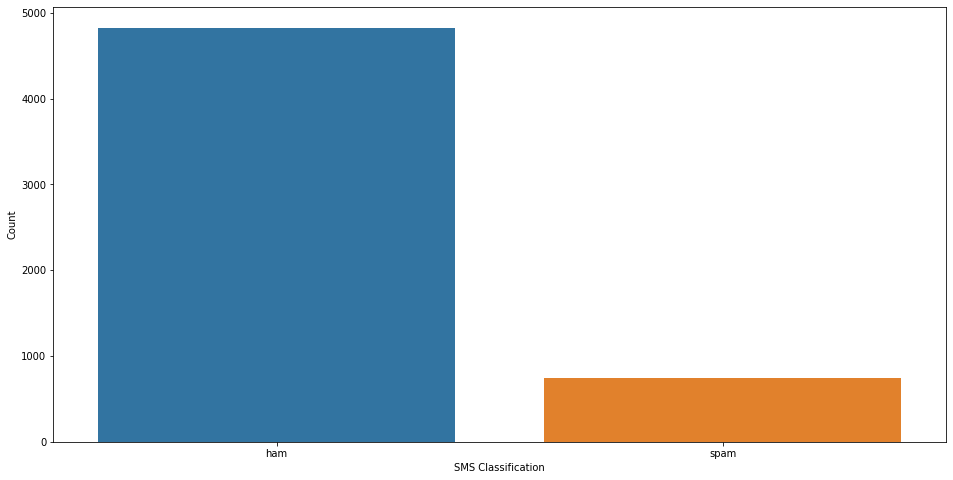

In [4]:
plt.figure(figsize=(8,5))
plt.figure(figsize=(16,8))
sns.countplot(x='label', data=df)
plt.xlabel('SMS Classification')
plt.ylabel('Count')

In [5]:
# Importing essential libraries for performing Natural Language Processing on 'SMS Spam Collection' dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harshitbirla/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
corpus = []
ps = PorterStemmer()

for i in range(0,df.shape[0]):
  
  # Cleaning special character from the message
  message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df.message[i])

  # Converting the entire message into lower case
  message = message.lower()

  # Tokenizing the review by words
  words = message.split()

  # Removing the stop words
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in words]

  # Joining the stemmed words
  message = ' '.join(words)

  # Building a corpus of messages
  corpus.append(message)

In [7]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [8]:
# Extracting dependent variable from the dataset
y = pd.get_dummies(df['label'])
y = y.iloc[:, 1].values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [10]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [11]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [12]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 97.76%
Precision score is: 0.91
Recall score is: 0.95


In [13]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[934,  16],
       [  9, 156]])

Text(69.0, 0.5, 'Actual values')

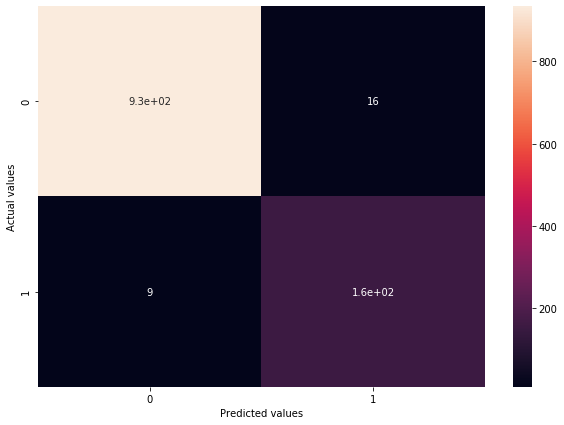

In [14]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [15]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.0,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.0 is: 97.4%
Accuracy score for alpha=0.1 is: 98.12%
Accuracy score for alpha=0.2 is: 98.21%
Accuracy score for alpha=0.3 is: 98.03%
Accuracy score for alpha=0.4 is: 98.03%
Accuracy score for alpha=0.5 is: 98.03%
Accuracy score for alpha=0.6 is: 97.94%
Accuracy score for alpha=0.7 is: 97.94%
Accuracy score for alpha=0.8 is: 97.76%
Accuracy score for alpha=0.9 is: 97.85%
Accuracy score for alpha=1.0 is: 97.76%
--------------------------------------------
The best accuracy is 98.21% with alpha value as 0.2


In [16]:
classifier = MultinomialNB(alpha=alpha_val)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.2)

In [17]:
def predict_spam(sample_message):
  sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
  sample_message = sample_message.lower()
  sample_message_words = sample_message.split()
  sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_message = [ps.stem(word) for word in sample_message_words]
  final_message = ' '.join(final_message)

  temp = cv.transform([final_message]).toarray()
  return classifier.predict(temp)

In [18]:
# Predicting values
sample_message = 'IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.'

if predict_spam(sample_message):
  print('This is a SPAM message!')
else:
  print('This is a normal message.')

This is a SPAM message!


In [19]:
# Predicting values
sample_message = 'Came to think of it. I have never got a spam message before.'

if predict_spam(sample_message):
  print('This is a SPAM message!')
else:
  print('This is a normal message.')

This is a normal message.


In [20]:
# Predicting values
sample_message = 'You have still not claimed the compensation you are due for the accident you had. To start the process please reply YES. To opt out text STOP.'

if predict_spam(sample_message):
  print('This is a SPAM message!')
else:
  print('This is a normal message.')

This is a SPAM message!


In [21]:
pickle.dump(cv, open('cv-transform.pkl', 'wb'))
filename = 'spam-sms-mnb-model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>